In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
import nxviz as nv
import scipy.misc as ms
from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('u1', sep=' ', header=None, names=rnames)
ratings

,user_id,movie_id,rating,timestamp
0,user1,movie1,5,874965758
1,user1,movie2,3,876893171
2,user1,movie3,4,878542960
3,user1,movie4,3,876893119
4,user1,movie5,3,889751712
5,user1,movie7,4,875071561
6,user1,movie8,1,875072484
7,user1,movie9,5,878543541
8,user1,movie11,2,875072262
9,user1,movie13,5,875071805


In [3]:
G = nx.Graph()
G.add_nodes_from(ratings['user_id'], bipartite='user_id')
G.add_nodes_from(ratings['movie_id'], bipartite='movie_id')

In [4]:
for i in range(80000):
    if ratings.rating[i]>2.5:
        G.add_edges_from([(ratings.user_id[i], ratings.movie_id[i])])

In [5]:
user_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'user_id']
movie_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'movie_id']
userG = nx.bipartite.projected_graph(G, nodes=user_nodes)
movieG = nx.bipartite.projected_graph(G, nodes=movie_nodes)

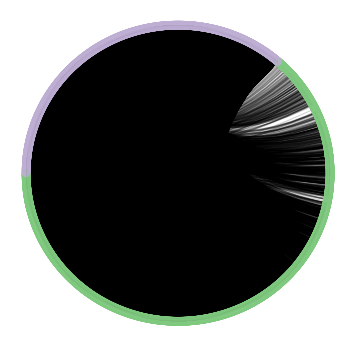

In [6]:
c = nv.CircosPlot(G, node_grouping='bipartite',node_color='bipartite')
c.draw()
plt.show()

/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


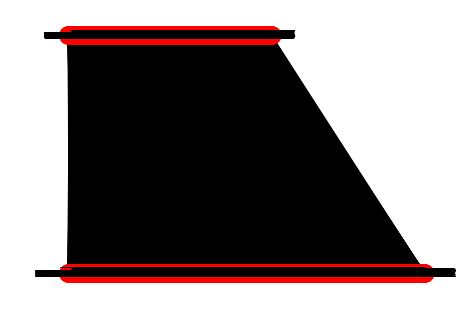

In [7]:
X,Y = nx.bipartite.sets(G)
pos = dict()
pos.update( (n, (i, 2)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (i, 1)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(G, pos=pos, with_labels = True)
plt.show()

/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


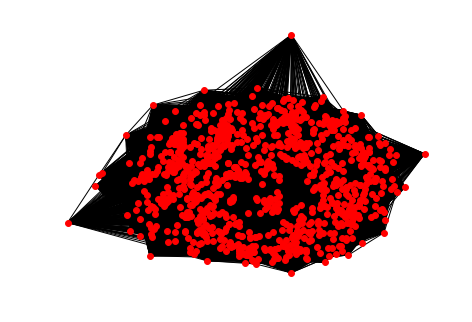

In [15]:
nx.draw(userG,node_size = 35)
plt.show()

In [9]:
number_of_connections = []
for node in X:
    count = 0
    liste = []
    for edge in G.edges():
        if edge[0] == node:
            count = count + 1
            liste.append(edge[1])
    number_of_connections.append([node, count, liste])
    
number_of_connections

[['user327',
  135,
  ['movie1',
   'movie4',
   'movie7',
   'movie8',
   'movie10',
   'movie11',
   'movie12',
   'movie22',
   'movie23',
   'movie26',
   'movie28',
   'movie33',
   'movie42',
   'movie44',
   'movie47',
   'movie48',
   'movie55',
   'movie66',
   'movie70',
   'movie79',
   'movie86',
   'movie87',
   'movie92',
   'movie95',
   'movie98',
   'movie99',
   'movie100',
   'movie108',
   'movie111',
   'movie117',
   'movie129',
   'movie131',
   'movie132',
   'movie150',
   'movie151',
   'movie152',
   'movie154',
   'movie156',
   'movie160',
   'movie161',
   'movie164',
   'movie168',
   'movie172',
   'movie174',
   'movie176',
   'movie178',
   'movie180',
   'movie181',
   'movie182',
   'movie183',
   'movie184',
   'movie190',
   'movie201',
   'movie202',
   'movie204',
   'movie209',
   'movie211',
   'movie217',
   'movie218',
   'movie228',
   'movie232',
   'movie246',
   'movie255',
   'movie268',
   'movie269',
   'movie271',
   'movie275',
   'm

In [10]:
number_of_common_connections = []
for i in range(len(number_of_connections)-1):
    for j in range(i+1,len(number_of_connections)):
        number_of_common_connections.append([number_of_connections[i][0],number_of_connections[j][0],len(set(number_of_connections[i][2])&set(number_of_connections[j][2]))])
        
number_of_common_connections

[['user327', 'user300', 0],
 ['user327', 'user764', 25],
 ['user327', 'user353', 2],
 ['user327', 'user349', 3],
 ['user327', 'user371', 14],
 ['user327', 'user58', 21],
 ['user327', 'user419', 8],
 ['user327', 'user909', 5],
 ['user327', 'user708', 11],
 ['user327', 'user773', 35],
 ['user327', 'user608', 32],
 ['user327', 'user283', 8],
 ['user327', 'user174', 20],
 ['user327', 'user808', 5],
 ['user327', 'user518', 9],
 ['user327', 'user436', 25],
 ['user327', 'user781', 14],
 ['user327', 'user182', 6],
 ['user327', 'user435', 63],
 ['user327', 'user159', 3],
 ['user327', 'user593', 29],
 ['user327', 'user131', 1],
 ['user327', 'user826', 26],
 ['user327', 'user901', 23],
 ['user327', 'user134', 3],
 ['user327', 'user797', 3],
 ['user327', 'user429', 81],
 ['user327', 'user665', 25],
 ['user327', 'user507', 7],
 ['user327', 'user699', 26],
 ['user327', 'user121', 9],
 ['user327', 'user315', 19],
 ['user327', 'user19', 3],
 ['user327', 'user152', 10],
 ['user327', 'user840', 43],
 ['

In [11]:
Graph = nx.Graph()
Graph.add_nodes_from(ratings['user_id'], bipartite='user_id')
Graph.nodes()

['user1',
 'user2',
 'user3',
 'user4',
 'user5',
 'user6',
 'user7',
 'user8',
 'user9',
 'user10',
 'user11',
 'user12',
 'user13',
 'user14',
 'user15',
 'user16',
 'user17',
 'user18',
 'user19',
 'user20',
 'user21',
 'user22',
 'user23',
 'user24',
 'user25',
 'user26',
 'user27',
 'user28',
 'user29',
 'user30',
 'user31',
 'user32',
 'user33',
 'user34',
 'user35',
 'user36',
 'user37',
 'user38',
 'user39',
 'user40',
 'user41',
 'user42',
 'user43',
 'user44',
 'user45',
 'user46',
 'user47',
 'user48',
 'user49',
 'user50',
 'user51',
 'user52',
 'user53',
 'user54',
 'user55',
 'user56',
 'user57',
 'user58',
 'user59',
 'user60',
 'user61',
 'user62',
 'user63',
 'user64',
 'user65',
 'user66',
 'user67',
 'user68',
 'user69',
 'user70',
 'user71',
 'user72',
 'user73',
 'user74',
 'user75',
 'user76',
 'user77',
 'user78',
 'user79',
 'user80',
 'user81',
 'user82',
 'user83',
 'user84',
 'user85',
 'user86',
 'user87',
 'user88',
 'user89',
 'user90',
 'user91',
 'user92

In [12]:
Nb = len(Y)
for common_connection in number_of_common_connections:
    Ni = 0
    Nj = 0
    Nij = common_connection[2]
    if Nij != 0:
        node_i = common_connection[0]
        node_j = common_connection[1]
        for connection in number_of_connections:
            if node_i == connection[0]:
                Ni = connection[1]
            elif node_j == connection[0]:
                Nj = connection[1]
        summ = 0
        for k in range(Nij):
            H = (ms.comb(Ni,k)*ms.comb(Nb-Ni,Nj-k))/ms.comb(Nb,Nj)
            summ = summ + H
        prob = 1-summ
        if prob<0.000001:
            Graph.add_edges_from([(node_i,node_j)])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()


/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


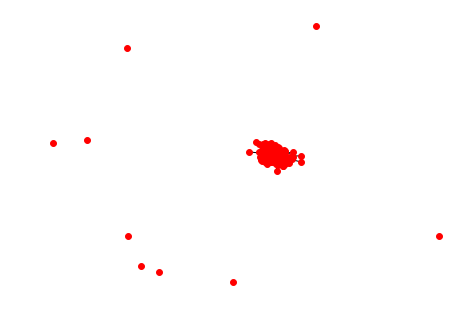

In [13]:
nx.draw(Graph, with_labels = False, node_size = 35)
plt.show()

/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


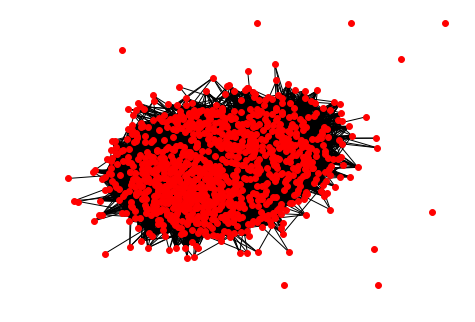

In [14]:
pos = graphviz_layout(Graph)
nx.draw(Graph, pos, node_size = 35)
#nx.draw(Graph, pos, with_labels = True)
plt.show()